In [1]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import librosa.display

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from __future__ import division, print_function, absolute_import
from tf_utils import random_mini_batches, load_features_with_deltas_stacking_nosplit
from tf_utils import load_features_with_deltas_stacking_nosplit_noslicing

In [3]:
#train_data, test_data, train_labels, test_labels = load_features()
# now with deltas
data,labels = load_features_with_deltas_stacking_nosplit()

In [4]:
data.shape

(2029, 256, 28)

In [5]:
labels.shape

(2029, 2)

In [6]:
np.min(labels[:,0])

0

In [7]:
np.max(labels[:,0])

1

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)

In [10]:
pca.fit(data[0])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
print(pca.singular_values_)

[2191.018    246.06041]


In [12]:
singular_values_per_slice=[]

In [13]:
for i in range(data.shape[0]):
    print('slice=',i, " label=", labels[i])
    pca = PCA(n_components=2)
    pca.fit(data[i])
    singular_values_per_slice.append(pca.singular_values_)

slice= 0  label= [0 1]
slice= 1  label= [0 1]
slice= 2  label= [0 1]
slice= 3  label= [0 1]
slice= 4  label= [0 1]
slice= 5  label= [0 1]
slice= 6  label= [0 1]
slice= 7  label= [0 1]
slice= 8  label= [0 1]
slice= 9  label= [0 1]
slice= 10  label= [0 1]
slice= 11  label= [0 1]
slice= 12  label= [ 0 10]
slice= 13  label= [ 0 10]
slice= 14  label= [ 0 10]
slice= 15  label= [ 0 10]
slice= 16  label= [ 0 10]
slice= 17  label= [ 0 10]
slice= 18  label= [ 0 10]
slice= 19  label= [ 0 10]
slice= 20  label= [ 0 10]
slice= 21  label= [ 0 10]
slice= 22  label= [  0 100]
slice= 23  label= [  0 101]
slice= 24  label= [  0 101]
slice= 25  label= [  0 101]
slice= 26  label= [  0 101]
slice= 27  label= [  0 101]
slice= 28  label= [  0 101]
slice= 29  label= [  0 101]
slice= 30  label= [  0 101]
slice= 31  label= [  0 101]
slice= 32  label= [  0 101]
slice= 33  label= [  0 101]
slice= 34  label= [  0 101]
slice= 35  label= [  0 102]
slice= 36  label= [  0 102]
slice= 37  label= [  0 102]
slice= 38  lab

slice= 294  label= [ 0 13]
slice= 295  label= [ 0 13]
slice= 296  label= [ 0 13]
slice= 297  label= [ 0 13]
slice= 298  label= [ 0 13]
slice= 299  label= [ 0 13]
slice= 300  label= [ 0 13]
slice= 301  label= [ 0 13]
slice= 302  label= [ 0 13]
slice= 303  label= [  0 130]
slice= 304  label= [  0 131]
slice= 305  label= [  0 132]
slice= 306  label= [  0 132]
slice= 307  label= [  0 132]
slice= 308  label= [  0 132]
slice= 309  label= [  0 132]
slice= 310  label= [  0 132]
slice= 311  label= [  0 132]
slice= 312  label= [  0 132]
slice= 313  label= [  0 132]
slice= 314  label= [  0 132]
slice= 315  label= [  0 132]
slice= 316  label= [  0 132]
slice= 317  label= [  0 132]
slice= 318  label= [  0 132]
slice= 319  label= [  0 132]
slice= 320  label= [  0 132]
slice= 321  label= [  0 133]
slice= 322  label= [  0 134]
slice= 323  label= [  0 135]
slice= 324  label= [  0 136]
slice= 325  label= [  0 136]
slice= 326  label= [  0 136]
slice= 327  label= [  0 136]
slice= 328  label= [  0 136]
sli

slice= 621  label= [ 0 22]
slice= 622  label= [ 0 22]
slice= 623  label= [ 0 22]
slice= 624  label= [ 0 22]
slice= 625  label= [ 0 22]
slice= 626  label= [ 0 22]
slice= 627  label= [ 0 22]
slice= 628  label= [ 0 22]
slice= 629  label= [ 0 22]
slice= 630  label= [ 0 23]
slice= 631  label= [ 0 23]
slice= 632  label= [ 0 23]
slice= 633  label= [ 0 23]
slice= 634  label= [ 0 23]
slice= 635  label= [ 0 23]
slice= 636  label= [ 0 23]
slice= 637  label= [ 0 23]
slice= 638  label= [ 0 23]
slice= 639  label= [ 0 23]
slice= 640  label= [ 0 23]
slice= 641  label= [ 0 24]
slice= 642  label= [ 0 24]
slice= 643  label= [ 0 24]
slice= 644  label= [ 0 25]
slice= 645  label= [ 0 25]
slice= 646  label= [ 0 25]
slice= 647  label= [ 0 25]
slice= 648  label= [ 0 25]
slice= 649  label= [ 0 25]
slice= 650  label= [ 0 25]
slice= 651  label= [ 0 25]
slice= 652  label= [ 0 25]
slice= 653  label= [ 0 25]
slice= 654  label= [ 0 25]
slice= 655  label= [ 0 25]
slice= 656  label= [ 0 25]
slice= 657  label= [ 0 26]
s

slice= 973  label= [ 0 51]
slice= 974  label= [ 0 51]
slice= 975  label= [ 0 51]
slice= 976  label= [ 0 52]
slice= 977  label= [ 0 52]
slice= 978  label= [ 0 53]
slice= 979  label= [ 0 54]
slice= 980  label= [ 0 55]
slice= 981  label= [ 0 56]
slice= 982  label= [ 0 57]
slice= 983  label= [ 0 57]
slice= 984  label= [ 0 57]
slice= 985  label= [ 0 57]
slice= 986  label= [ 0 57]
slice= 987  label= [ 0 57]
slice= 988  label= [ 0 57]
slice= 989  label= [ 0 57]
slice= 990  label= [ 0 57]
slice= 991  label= [ 0 57]
slice= 992  label= [ 0 57]
slice= 993  label= [ 0 57]
slice= 994  label= [ 0 57]
slice= 995  label= [ 0 58]
slice= 996  label= [ 0 58]
slice= 997  label= [ 0 58]
slice= 998  label= [ 0 58]
slice= 999  label= [ 0 58]
slice= 1000  label= [ 0 58]
slice= 1001  label= [ 0 58]
slice= 1002  label= [ 0 58]
slice= 1003  label= [ 0 58]
slice= 1004  label= [ 0 58]
slice= 1005  label= [ 0 58]
slice= 1006  label= [ 0 58]
slice= 1007  label= [ 0 58]
slice= 1008  label= [ 0 59]
slice= 1009  label=

slice= 1326  label= [ 0 90]
slice= 1327  label= [ 0 90]
slice= 1328  label= [ 0 90]
slice= 1329  label= [ 0 91]
slice= 1330  label= [ 0 92]
slice= 1331  label= [ 0 93]
slice= 1332  label= [ 0 93]
slice= 1333  label= [ 0 94]
slice= 1334  label= [ 0 94]
slice= 1335  label= [ 0 94]
slice= 1336  label= [ 0 94]
slice= 1337  label= [ 0 94]
slice= 1338  label= [ 0 94]
slice= 1339  label= [ 0 94]
slice= 1340  label= [ 0 94]
slice= 1341  label= [ 0 94]
slice= 1342  label= [ 0 94]
slice= 1343  label= [ 0 94]
slice= 1344  label= [ 0 94]
slice= 1345  label= [ 0 94]
slice= 1346  label= [ 0 95]
slice= 1347  label= [ 0 95]
slice= 1348  label= [ 0 95]
slice= 1349  label= [ 0 95]
slice= 1350  label= [ 0 95]
slice= 1351  label= [ 0 95]
slice= 1352  label= [ 0 95]
slice= 1353  label= [ 0 95]
slice= 1354  label= [ 0 95]
slice= 1355  label= [ 0 95]
slice= 1356  label= [ 0 95]
slice= 1357  label= [ 0 95]
slice= 1358  label= [ 0 95]
slice= 1359  label= [ 0 96]
slice= 1360  label= [ 0 96]
slice= 1361  label= 

slice= 1674  label= [ 1 28]
slice= 1675  label= [ 1 28]
slice= 1676  label= [ 1 28]
slice= 1677  label= [ 1 29]
slice= 1678  label= [ 1 29]
slice= 1679  label= [ 1 29]
slice= 1680  label= [ 1 29]
slice= 1681  label= [ 1 29]
slice= 1682  label= [ 1 29]
slice= 1683  label= [ 1 29]
slice= 1684  label= [1 3]
slice= 1685  label= [1 3]
slice= 1686  label= [1 3]
slice= 1687  label= [ 1 30]
slice= 1688  label= [ 1 30]
slice= 1689  label= [ 1 30]
slice= 1690  label= [ 1 31]
slice= 1691  label= [ 1 31]
slice= 1692  label= [ 1 31]
slice= 1693  label= [ 1 32]
slice= 1694  label= [ 1 32]
slice= 1695  label= [ 1 33]
slice= 1696  label= [ 1 33]
slice= 1697  label= [ 1 33]
slice= 1698  label= [ 1 33]
slice= 1699  label= [ 1 34]
slice= 1700  label= [ 1 34]
slice= 1701  label= [ 1 34]
slice= 1702  label= [ 1 34]
slice= 1703  label= [ 1 35]
slice= 1704  label= [ 1 35]
slice= 1705  label= [ 1 36]
slice= 1706  label= [ 1 36]
slice= 1707  label= [ 1 36]
slice= 1708  label= [ 1 36]
slice= 1709  label= [ 1 36

slice= 2006  label= [ 1 97]
slice= 2007  label= [ 1 97]
slice= 2008  label= [ 1 97]
slice= 2009  label= [ 1 97]
slice= 2010  label= [ 1 97]
slice= 2011  label= [ 1 97]
slice= 2012  label= [ 1 98]
slice= 2013  label= [ 1 98]
slice= 2014  label= [ 1 98]
slice= 2015  label= [ 1 98]
slice= 2016  label= [ 1 98]
slice= 2017  label= [ 1 98]
slice= 2018  label= [ 1 99]
slice= 2019  label= [ 1 99]
slice= 2020  label= [ 1 99]
slice= 2021  label= [ 1 99]
slice= 2022  label= [ 1 99]
slice= 2023  label= [ 1 99]
slice= 2024  label= [ 1 99]
slice= 2025  label= [ 1 99]
slice= 2026  label= [ 1 99]
slice= 2027  label= [ 1 99]
slice= 2028  label= [ 1 99]


In [14]:
singular_values_per_slice

[array([2191.018  ,  246.06041], dtype=float32),
 array([2094.9443 ,  225.71822], dtype=float32),
 array([2020.2017 ,  224.25853], dtype=float32),
 array([2141.151  ,  221.49933], dtype=float32),
 array([2441.1055  ,  113.004654], dtype=float32),
 array([2081.3474 ,  148.12807], dtype=float32),
 array([1929.1971 ,  315.70703], dtype=float32),
 array([2180.5425 ,  160.42712], dtype=float32),
 array([2306.7212 ,  203.05667], dtype=float32),
 array([2484.5146 ,   68.91195], dtype=float32),
 array([2477.2625 ,   77.03618], dtype=float32),
 array([2212.8245 ,  183.15392], dtype=float32),
 array([2026.0903 ,  360.58026], dtype=float32),
 array([2743.7102 ,  421.11395], dtype=float32),
 array([2398.1995 ,  440.80734], dtype=float32),
 array([2345.715 ,  580.2998], dtype=float32),
 array([2554.0356,  406.2393], dtype=float32),
 array([2325.6987 ,  442.17612], dtype=float32),
 array([2231.2793,  668.2635], dtype=float32),
 array([2779.3845 ,  486.46295], dtype=float32),
 array([2067.9023,  397.

In [15]:
singular_values_per_slice[0]

array([2191.018  ,  246.06041], dtype=float32)

In [16]:
singular_values_per_slice = np.array(singular_values_per_slice)

In [17]:
singular_values_per_slice.shape

(2029, 2)

In [18]:
#label = 0 #'cat'
#label = 1 #'dog'

In [19]:
def eval(x):
    if ( x == 0):
        return 'red' # cat
    else:
        return 'blue' # dog

In [20]:
colours = [eval(x) for x in labels[:,0]]

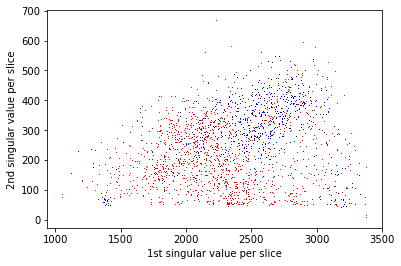

In [21]:
plt.scatter(singular_values_per_slice[:,0], singular_values_per_slice[:,1],color=colours,marker=',',lw=0, s=1)
plt.xlabel('1st singular value per slice')
plt.ylabel('2nd singular value per slice')
plt.show()

In [22]:
dog_cat_list_labels=[]
temp=list(labels)
for dog_or_cat in temp:
    dog_cat_list_labels.append(list(dog_or_cat))

In [23]:
len(dog_cat_list_labels)

2029

In [24]:
type(dog_cat_list_labels[100])

list

In [25]:
unique_data = [list(x) for x in set(tuple(x) for x in dog_cat_list_labels)]

In [26]:
len(unique_data)

277

In [27]:
np.add([1,2],[4,5])

array([5, 7])

In [28]:
singular_values_per_slice

array([[2191.018  ,  246.06041],
       [2094.9443 ,  225.71822],
       [2020.2017 ,  224.25853],
       ...,
       [2176.293  ,  280.8164 ],
       [1961.9274 ,  261.23447],
       [2173.4248 ,  315.57913]], dtype=float32)

In [29]:
average_singular_values_for_this_file=[]
for dog_or_cat in unique_data:
    # id of the file
    fileid=dog_or_cat[1]
    print('fileid=',fileid)
    singular_values_per_slice_for_this_file=[0,0]
    counti=0
    for i in range(len(dog_cat_list_labels)):
        if ( dog_cat_list_labels[i][1] == fileid):
            print(i)
            counti=counti+1
            print(singular_values_per_slice[i])
            singular_values_per_slice_for_this_file = singular_values_per_slice_for_this_file + singular_values_per_slice[i]
            print(singular_values_per_slice_for_this_file)
    print('counti',counti)
    singular_values_per_slice_for_this_file=singular_values_per_slice_for_this_file/counti 
    print(singular_values_per_slice_for_this_file)
    average_singular_values_for_this_file.append(singular_values_per_slice_for_this_file)

fileid= 34
736
[2513.577    309.71057]
[2513.5769043   309.71057129]
737
[2540.577    274.87497]
[5054.15380859  584.58554077]
738
[2976.2659  269.6675]
[8030.41967773  854.25305176]
739
[2475.9631   402.97388]
[10506.3828125   1257.22692871]
740
[2698.5398   412.46143]
[13204.92260742  1669.68835449]
741
[2666.061    386.44714]
[15870.98364258  2056.13549805]
742
[2716.2554  276.0441]
[18587.23901367  2332.17959595]
743
[2654.358    345.32187]
[21241.59692383  2677.50146484]
744
[2767.8713   255.41652]
[24009.46826172  2932.91798401]
1699
[2460.028   207.4923]
[26469.49633789  3140.41027832]
1700
[2839.2092   362.35583]
[29308.70556641  3502.76611328]
1701
[2531.5344   368.31982]
[31840.23999023  3871.0859375 ]
1702
[2724.6357   346.53256]
[34564.87573242  4217.61849976]
counti 13
[2658.8365948   324.43219229]
fileid= 86
1278
[1866.1292   354.42407]
[1866.12915039  354.42407227]
1279
[2149.731    293.53647]
[4015.86010742  647.96054077]
1917
[2309.104    231.31538]
[6324.96411133  879

867
[2255.0452   323.68097]
[2255.04516602  323.68096924]
868
[2259.8394  305.7831]
[4514.88452148  629.46408081]
869
[2331.3574   276.60715]
[6846.24194336  906.07122803]
870
[2199.0994   333.73816]
[9045.34130859 1239.80938721]
871
[2402.2512   270.04272]
[11447.5925293   1509.85211182]
872
[2197.846    275.07358]
[13645.43847656  1784.9256897 ]
873
[2443.1284  111.7804]
[16088.56689453  1896.70609283]
874
[2261.6194  330.2298]
[18350.1862793  2226.9358902]
875
[2245.3674   336.35788]
[20595.55371094  2563.29376984]
876
[2468.9016     49.077988]
[23064.45532227  2612.37175751]
877
[2292.19     330.61115]
[25356.64526367  2942.98290253]
878
[2313.8845   318.88486]
[27670.52978516  3261.8677597 ]
879
[2360.3555   299.62387]
[30030.88525391  3561.49163055]
880
[2269.9866   275.31943]
[32300.87182617  3836.81105804]
881
[2447.4697     67.336845]
[34748.34155273  3904.14790344]
882
[2262.871    210.25769]
[37011.21264648  4114.40559387]
883
[2316.1104   199.51805]
[39327.32299805  4313.92

[1959.2249   102.23287]
[20151.21643066  2735.50389862]
283
[2456.759    337.48578]
[22607.97546387  3072.98967743]
284
[1900.1495   182.59097]
[24508.125       3255.58065033]
counti 12
[2042.34375     271.29838753]
fileid= 54
979
[1590.8551   311.78506]
[1590.85510254  311.7850647 ]
1796
[2404.3938   362.76895]
[3995.24890137  674.55401611]
1797
[2803.4805  386.06  ]
[6798.72937012 1060.61401367]
1798
[2774.8655   331.32886]
[9573.59484863 1391.94287109]
1799
[2602.774    405.40338]
[12176.36877441  1797.34625244]
counti 5
[2435.27375488  359.46925049]
fileid= 58
995
[1847.3217   161.65878]
[1847.32165527  161.65878296]
996
[1931.1552   219.34894]
[3778.47680664  381.00772095]
997
[1941.6356  153.3122]
[5720.11242676  534.31991577]
998
[2117.0037   126.64016]
[7837.11608887  660.96007538]
999
[1928.9362  179.3943]
[9766.05224609  840.35437775]
1000
[2141.4065   118.64206]
[11907.45874023   958.99643707]
1001
[2024.275    189.42891]
[13931.73376465  1148.42534637]
1002
[1875.5803   239

[1869.7151   168.77956]
[14224.68933105  1228.5344696 ]
203
[2173.7595     61.377087]
[16398.44885254  1289.91155624]
204
[1782.6826  293.9722]
[18181.13146973  1583.88375473]
counti 9
[2020.12571886  175.98708386]
fileid= 84
1267
[1694.4598   255.11394]
[1694.45983887  255.11393738]
1268
[1569.8663   149.09433]
[3264.32617188  404.20826721]
1269
[1577.7312   127.46161]
[4842.05737305  531.6698761 ]
1270
[1468.5596   226.32584]
[6310.61694336  757.99571228]
1271
[1542.7002  220.9854]
[7853.31713867  978.98110962]
1272
[1588.3547   196.91658]
[9441.671875   1175.89768982]
1273
[1490.812    177.78055]
[10932.48388672  1353.67823792]
1274
[1572.4893   204.01553]
[12504.97314453  1557.69377136]
1275
[1609.9602   195.01205]
[14114.93334961  1752.70582581]
1276
[1575.9115   205.76462]
[15690.84484863  1958.47044373]
1910
[2275.6206  382.4359]
[17966.4654541   2340.90635681]
1911
[2787.4905   371.82074]
[20753.95593262  2712.72709656]
counti 12
[1729.49632772  226.06059138]
fileid= 154
446
[2

[25853.93652344  2572.0743866 ]
536
[3135.9907   278.10876]
[28989.92724609  2850.18315125]
537
[3039.7053   251.61166]
[32029.63256836  3101.79481506]
538
[3086.4597   249.24232]
[35116.09228516  3351.03713989]
539
[2692.3618  376.2209]
[37808.45410156  3727.25802612]
counti 13
[2908.3426232   286.71215586]
fileid= 43
841
[2259.4133   122.48076]
[2259.41333008  122.48075867]
842
[2121.5322   229.15477]
[4380.94555664  351.63552856]
843
[2155.8926   280.16064]
[6536.83813477  631.7961731 ]
844
[2111.3958   267.12006]
[8648.23388672  898.91622925]
845
[2143.089    234.51796]
[10791.32299805  1133.43418884]
846
[2248.5256    62.75253]
[13039.84863281  1196.18671799]
847
[2247.9888    99.56176]
[15287.83740234  1295.74847794]
848
[2189.3152   193.61014]
[17477.15258789  1489.35861588]
849
[1953.0168  284.9267]
[19430.16943359  1774.28531265]
850
[2307.9053    110.877945]
[21738.07470703  1885.1632576 ]
851
[2308.6873   109.63059]
[24046.76196289  1994.79384995]
852
[2187.8533   315.69308]

[2896.0042   265.39932]
[25079.04125977  2003.45493317]
1042
[2645.3242   234.35542]
[27724.36547852  2237.81035614]
1043
[2892.1567  278.4418]
[30616.5222168   2516.25215912]
1044
[2735.8164   371.84857]
[33352.33862305  2888.1007309 ]
1045
[2646.2766   292.95078]
[35998.61523438  3181.05150604]
1046
[2632.0698   130.93536]
[38630.68505859  3311.98686981]
1047
[2856.574     106.025154]
[41487.2590332   3418.01202393]
1826
[2522.2168   272.16672]
[44009.47583008  3690.17874146]
1827
[2757.03    296.4118]
[46766.50585938  3986.59054565]
counti 17
[2750.9709329   234.50532621]
fileid= 36
757
[2193.4172  210.6301]
[2193.41723633  210.63009644]
758
[2253.0125   120.16488]
[4446.4296875   330.79497528]
759
[2306.2825     78.455475]
[6752.7121582   409.25045013]
760
[1716.9218   296.70984]
[8469.63391113  705.960289  ]
761
[2296.237     71.27251]
[10765.87097168   777.23279572]
762
[2133.4246   254.55972]
[12899.29553223  1031.79251862]
763
[1854.1235   376.48132]
[14753.41906738  1408.27384

1906
[2521.6428   265.99396]
[31401.90222168  3025.97637939]
counti 16
[1962.61888885  189.12352371]
fileid= 5
937
[2479.2317   261.79977]
[2479.23168945  261.79977417]
938
[2297.6252  143.0179]
[4776.85693359  404.81767273]
939
[2221.9155   358.65442]
[6998.77246094  763.47209167]
940
[2671.7126   253.07573]
[9670.48510742 1016.54782104]
941
[2092.9604   416.88028]
[11763.44555664  1433.42810059]
942
[2436.1228   182.47305]
[14199.56835938  1615.90115356]
943
[2376.4915   377.77814]
[16576.05981445  1993.67929077]
944
[2270.0525  296.8482]
[18846.11230469  2290.52749634]
945
[2383.3665   124.34958]
[21229.47875977  2414.8770752 ]
946
[2531.5847   135.37883]
[23761.06347656  2550.25590515]
947
[2241.8713    111.290886]
[26002.93481445  2661.54679108]
948
[2418.7168   167.96939]
[28421.65161133  2829.51618195]
949
[2804.7188   154.47108]
[31226.37036133  2983.98726654]
1770
[1956.7682   345.18893]
[33183.1385498   3329.17620087]
1771
[2353.4058   394.33493]
[35536.54431152  3723.5111312

[2675.4695     57.979942]
[21960.75439453  2169.33602142]
1080
[2471.6663   227.44002]
[24432.4206543   2396.77603912]
1081
[2683.796     56.81239]
[27116.21655273  2453.5884285 ]
1082
[2558.4983   273.20328]
[29674.71484375  2726.79170609]
1083
[2380.7876   291.92596]
[32055.50244141  3018.71767044]
1835
[2569.4856  405.6884]
[34624.98803711  3424.40605545]
1836
[2813.2976   468.89774]
[37438.28564453  3893.30379105]
1837
[2915.1338  373.3582]
[40353.41943359  4266.66197586]
1838
[2777.0176   394.11197]
[43130.43701172  4660.77394485]
counti 17
[2537.0845301   274.16317323]
fileid= 33
732
[1834.4781   255.96089]
[1834.47814941  255.96089172]
733
[1836.5779   215.16327]
[3671.05603027  471.12416077]
734
[1349.9344   259.77765]
[5020.99047852  730.90180969]
735
[1517.4174   314.29495]
[6538.40783691 1045.19676208]
1695
[2101.7      210.05566]
[8640.10778809 1255.25242615]
1696
[2581.1235   354.11032]
[11221.23132324  1609.36274719]
1697
[2714.0828  322.5254]
[13935.31408691  1931.888137

[13648.88769531  2142.90127563]
counti 6
[2274.81461589  357.15021261]
fileid= 58
995
[1847.3217   161.65878]
[1847.32165527  161.65878296]
996
[1931.1552   219.34894]
[3778.47680664  381.00772095]
997
[1941.6356  153.3122]
[5720.11242676  534.31991577]
998
[2117.0037   126.64016]
[7837.11608887  660.96007538]
999
[1928.9362  179.3943]
[9766.05224609  840.35437775]
1000
[2141.4065   118.64206]
[11907.45874023   958.99643707]
1001
[2024.275    189.42891]
[13931.73376465  1148.42534637]
1002
[1875.5803   239.76236]
[15807.31408691  1388.18770599]
1003
[1902.308    239.82733]
[17709.62207031  1628.01503754]
1004
[1877.3588   320.27838]
[19586.98083496  1948.29341888]
1005
[1990.9125   149.78584]
[21577.89331055  2098.07926178]
1006
[1950.554    193.89764]
[23528.44726562  2291.97690582]
1007
[2047.1046   193.49408]
[25575.55187988  2485.47098541]
1810
[2406.5742   412.10202]
[27982.12609863  2897.57300568]
1811
[2557.8262   427.09702]
[30539.95227051  3324.67002106]
1812
[2571.983    287.

1300
[2188.254    209.73947]
[26429.3425293   1781.96047974]
1301
[2382.948     123.514206]
[28812.29052734  1905.47468567]
1302
[2479.5166   149.72198]
[31291.80712891  2055.19667053]
1921
[2145.388    269.73907]
[33437.19506836  2324.93574524]
counti 14
[2388.37107631  166.06683895]
fileid= 142
348
[1933.1923  349.9151]
[1933.19226074  349.9151001 ]
349
[2454.3206   250.59395]
[4387.51281738  600.50904846]
350
[2341.3357   316.56815]
[6728.84851074  917.07719421]
351
[2078.8652   323.77414]
[8807.71374512 1240.85133362]
counti 4
[2201.92843628  310.2128334 ]
fileid= 48
911
[2787.583    435.01782]
[2787.58300781  435.01782227]
912
[3011.4      498.69128]
[5798.98291016  933.70910645]
913
[2677.2917   388.97388]
[8476.2746582 1322.6829834]
914
[3161.7441   235.95926]
[11638.01879883  1558.64224243]
915
[2709.1174   457.38055]
[14347.13623047  2016.02279663]
916
[2837.7122  394.9424]
[17184.84838867  2410.96520996]
917
[3080.3596   478.02048]
[20265.20800781  2888.98568726]
918
[2629.13

[1850.6562   223.65076]
[9563.19824219  944.51417542]
649
[2024.9576   116.11051]
[11588.15588379  1060.62468719]
650
[2058.7734   136.08109]
[13646.92932129  1196.7057724 ]
651
[2163.3174    62.60609]
[15810.2467041   1259.31186295]
652
[2178.4346     50.116814]
[17988.68127441  1309.42867661]
653
[2162.788     61.37119]
[20151.46936035  1370.79986572]
654
[1892.9889   184.55518]
[22044.45825195  1555.3550415 ]
655
[2033.0408   136.05824]
[24077.49902344  1691.4132843 ]
656
[1832.8002   264.08667]
[25910.29919434  1955.49995422]
1633
[1871.3878   239.64384]
[27781.68701172  2195.14379883]
1634
[1880.9615  234.0784]
[29662.64855957  2429.22219849]
1635
[1889.1571   252.11116]
[31551.80566406  2681.33335876]
1636
[2061.4185   211.92441]
[33613.22412109  2893.25776672]
1637
[2066.5818   140.04272]
[35679.8059082   3033.30049133]
1638
[1938.4806  236.6359]
[37618.28649902  3269.93638611]
1639
[1988.2224   272.27817]
[39606.50891113  3542.21455383]
1640
[2004.6941   328.36853]
[41611.20300

[2016.8802   255.35265]
[9456.37609863 1217.46992493]
624
[1979.6853   251.41211]
[11436.06140137  1468.8820343 ]
625
[2159.3037  148.2444]
[13595.3651123   1617.12643433]
626
[2005.6698   255.51933]
[15601.03491211  1872.64576721]
627
[1976.4197   239.61522]
[17577.45458984  2112.26098633]
628
[1791.4692   332.76523]
[19368.92382812  2445.0262146 ]
629
[2211.3284    63.26924]
[21580.25219727  2508.29545593]
1609
[2576.2717  560.6023]
[24156.52392578  3068.89775085]
1610
[2701.9155   432.37952]
[26858.43945312  3501.27726746]
1611
[2369.433   485.9502]
[29227.87255859  3987.22746277]
counti 14
[2087.70518276  284.80196163]
fileid= 91
1329
[1569.2377   248.97276]
[1569.2376709   248.97276306]
1937
[2718.7422  440.8265]
[4287.9798584   689.79927063]
1938
[2906.589   386.6012]
[7194.56896973 1076.40046692]
1939
[2738.437    353.72968]
[9933.00598145 1430.13014221]
1940
[2869.8506   423.69827]
[12802.85656738  1853.82841492]
1941
[2653.5964  388.9726]
[15456.45300293  2242.80101013]
1942
[

145
[2765.5374   468.27982]
[14311.94384766  2182.76577759]
counti 5
[2862.38876953  436.55315552]
fileid= 81
1239
[1667.8397   107.08094]
[1667.83972168  107.08094025]
1240
[1748.8489   142.18054]
[3416.68859863  249.26148224]
1241
[1832.6611   101.82622]
[5249.34973145  351.08769989]
1242
[1785.6642   138.10481]
[7035.01391602  489.19251251]
1243
[1783.3765   172.98251]
[8818.39038086  662.17502594]
1244
[1689.9387   146.73729]
[10508.32910156   808.91231537]
1245
[1795.6664   163.97137]
[12303.9954834    972.88368988]
1246
[1794.711    134.14786]
[14098.70654297  1107.03154755]
1247
[1784.8667   150.23529]
[15883.57324219  1257.26683807]
1248
[1823.5355    122.636925]
[17707.10876465  1379.90376282]
1249
[1773.8497   170.95651]
[19480.95849609  1550.86027527]
1250
[1986.5242   166.31873]
[21467.48266602  1717.17900085]
1251
[1891.4623   167.14273]
[23358.94494629  1884.32173157]
1901
[2321.6453   323.87088]
[25680.59020996  2208.19261169]
1902
[2850.0842  386.8307]
[28530.67443848  

[2689.7976   380.08636]
[15670.71289062  2347.41668701]
1955
[2808.277   390.6427]
[18478.98999023  2738.05938721]
1956
[3092.951    361.94492]
[21571.94091797  3100.00430298]
1957
[2534.288    437.93573]
[24106.22900391  3537.94003296]
1958
[3271.744     107.300064]
[27377.97290039  3645.24009705]
1959
[2894.198    418.49753]
[30272.17089844  4063.73762512]
1960
[2861.9324   450.89188]
[33134.10327148  4514.62950134]
1961
[2663.1907  527.0194]
[35797.29394531  5041.64891052]
counti 13
[2753.63799579  387.81914696]
fileid= 130
303
[1941.6038  295.3338]
[1941.60375977  295.33380127]
counti 1
[1941.60375977  295.33380127]
fileid= 52
976
[2634.4924   317.22516]
[2634.49243164  317.22515869]
977
[2977.1777     50.369705]
[5611.67016602  367.59486389]
1787
[2339.9636   396.45633]
[7951.63378906  764.05119324]
1788
[2511.807    449.54816]
[10463.44067383  1213.59934998]
counti 4
[2615.86016846  303.39983749]
fileid= 60
1033
[2842.0676   169.61162]
[2842.06762695  169.61161804]
1034
[2896.076

1677
[2448.4587   281.72025]
[30445.51208496  3066.23200989]
1678
[2766.4404  354.8804]
[33211.95251465  3421.1124115 ]
1679
[2857.2212  199.2563]
[36069.17370605  3620.36871338]
1680
[2897.8208   227.49083]
[38966.99450684  3847.85954285]
1681
[2803.0886   306.76517]
[41770.08312988  4154.62471008]
1682
[2767.8826   309.81958]
[44537.96569824  4464.44429016]
1683
[2626.3591   438.95673]
[47164.3248291   4903.40101624]
counti 20
[2358.21624146  245.17005081]
fileid= 3
690
[2605.6587   104.15574]
[2605.65869141  104.15573883]
691
[2613.9514    64.35549]
[5219.61010742  168.51123047]
692
[2572.847      77.540245]
[7792.45703125  246.05147552]
693
[2059.3948   285.06183]
[9851.85180664  531.11330414]
694
[2164.3518  292.6765]
[12016.20361328   823.78981781]
695
[2289.3591   185.97818]
[14305.56274414  1009.76799774]
696
[2060.5522   203.50107]
[16366.11499023  1213.26906586]
697
[2500.6003    68.59514]
[18866.71533203  1281.86420441]
698
[2604.3018    68.12647]
[21471.01708984  1349.99067

[32150.8059082   2748.50411224]
1477
[1384.8134     69.277275]
[33535.6192627   2817.78138733]
1478
[1389.8413     50.862022]
[34925.46057129  2868.64340973]
1479
[1381.4203    64.31488]
[36306.88085938  2932.9582901 ]
1480
[1356.6481     88.507126]
[37663.52893066  3021.46541595]
1481
[1363.5148    75.77785]
[39027.04370117  3097.24326324]
1482
[1409.1595     54.030087]
[40436.20324707  3151.27334976]
1483
[1396.5583    64.98621]
[41832.76159668  3216.25956345]
1484
[1369.4075     58.589134]
[43202.16906738  3274.84869766]
1485
[1383.826      48.504402]
[44585.99511719  3323.35309982]
1486
[1418.6293     74.780334]
[46004.62438965  3398.1334343 ]
1487
[1424.8171    47.78791]
[47429.44152832  3445.92134476]
1488
[1383.096     82.60211]
[48812.53747559  3528.52345657]
1489
[1397.3671     62.503513]
[50209.90454102  3591.02696991]
counti 32
[1569.05951691  112.21959281]
fileid= 29
677
[2100.7446  304.0135]
[2100.74462891  304.01348877]
678
[2153.9402  264.662 ]
[4254.68481445  568.675476

1478
[1389.8413     50.862022]
[34925.46057129  2868.64340973]
1479
[1381.4203    64.31488]
[36306.88085938  2932.9582901 ]
1480
[1356.6481     88.507126]
[37663.52893066  3021.46541595]
1481
[1363.5148    75.77785]
[39027.04370117  3097.24326324]
1482
[1409.1595     54.030087]
[40436.20324707  3151.27334976]
1483
[1396.5583    64.98621]
[41832.76159668  3216.25956345]
1484
[1369.4075     58.589134]
[43202.16906738  3274.84869766]
1485
[1383.826      48.504402]
[44585.99511719  3323.35309982]
1486
[1418.6293     74.780334]
[46004.62438965  3398.1334343 ]
1487
[1424.8171    47.78791]
[47429.44152832  3445.92134476]
1488
[1383.096     82.60211]
[48812.53747559  3528.52345657]
1489
[1397.3671     62.503513]
[50209.90454102  3591.02696991]
counti 32
[1569.05951691  112.21959281]
fileid= 79
1211
[2643.3054   398.22842]
[2643.30541992  398.22842407]
1212
[3196.6816    90.29623]
[5839.98706055  488.52465057]
1213
[3232.981    104.17674]
[9072.96801758  592.70139313]
1214
[3270.2295    54.4111

[18458.61083984  1748.69055176]
1236
[1737.2902   152.92906]
[20195.90100098  1901.61961365]
1237
[1748.3951  142.7492]
[21944.29614258  2044.36882019]
1238
[1684.532   144.9186]
[23628.828125    2189.28741455]
1898
[2485.724    269.28192]
[26114.55224609  2458.56933594]
1899
[2849.1501   399.19998]
[28963.70239258  2857.76931763]
1900
[2917.682    288.49408]
[31881.38427734  3146.26339722]
counti 16
[1992.58651733  196.64146233]
fileid= 134
322
[2506.9097   425.39243]
[2506.90966797  425.39242554]
counti 1
[2506.90966797  425.39242554]
fileid= 69
1113
[2737.566   183.1556]
[2737.56591797  183.15559387]
1114
[2804.646     61.43644]
[5542.21191406  244.59203339]
1115
[2573.0186   282.00613]
[8115.23046875  526.59816742]
1116
[2605.7212   246.03627]
[10720.95166016   772.63443756]
1117
[2895.7378     61.235962]
[13616.68945312   833.87039948]
1118
[2911.1084    48.81827]
[16527.79785156   882.68867111]
1119
[2928.816      47.688087]
[19456.61376953   930.37675858]
1120
[2928.9116     61.

In [30]:
average_singular_values_for_this_file=np.array(average_singular_values_for_this_file)

In [31]:
len(average_singular_values_for_this_file)

277

In [32]:
np.array(unique_data)[:,0]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int16)

In [33]:
colours = [eval(x) for x in np.array(unique_data)[:,0]]

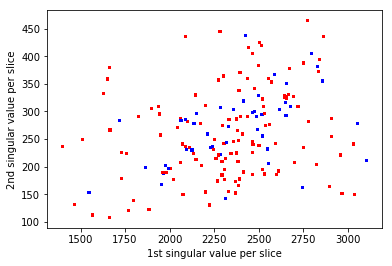

In [34]:
plt.scatter(average_singular_values_for_this_file[:,0], average_singular_values_for_this_file[:,1],color=colours,marker=',',lw=0, s=10)
plt.xlabel('1st singular value per slice')
plt.ylabel('2nd singular value per slice')
plt.show()

In [35]:
data_perfile,labels_perfile = load_features_with_deltas_stacking_nosplit_noslicing()

In [36]:
len(data_perfile)

277

In [37]:
labels_perfile.shape

(277, 2)

In [38]:
pca = PCA(n_components=3)

In [39]:
singular_values_per_file=[]

In [40]:
for i in range(len(data_perfile)):
    print('slice=',i, " label=", labels_perfile[i])
    pca = PCA(n_components=3)
    pca.fit(data_perfile[i])
    singular_values_per_file.append(pca.singular_values_)

slice= 0  label= [0 1]
slice= 1  label= [ 0 10]
slice= 2  label= [  0 100]
slice= 3  label= [  0 101]
slice= 4  label= [  0 102]
slice= 5  label= [  0 103]
slice= 6  label= [  0 105]
slice= 7  label= [  0 106]
slice= 8  label= [  0 107]
slice= 9  label= [  0 108]
slice= 10  label= [  0 109]
slice= 11  label= [ 0 11]
slice= 12  label= [  0 110]
slice= 13  label= [  0 112]
slice= 14  label= [  0 113]
slice= 15  label= [  0 114]
slice= 16  label= [  0 115]
slice= 17  label= [  0 116]
slice= 18  label= [  0 117]
slice= 19  label= [  0 118]
slice= 20  label= [  0 119]
slice= 21  label= [ 0 12]
slice= 22  label= [  0 120]
slice= 23  label= [  0 121]
slice= 24  label= [  0 122]
slice= 25  label= [  0 123]
slice= 26  label= [  0 124]
slice= 27  label= [  0 125]
slice= 28  label= [  0 126]
slice= 29  label= [  0 127]
slice= 30  label= [  0 128]
slice= 31  label= [  0 129]
slice= 32  label= [ 0 13]
slice= 33  label= [  0 130]
slice= 34  label= [  0 131]
slice= 35  label= [  0 132]
slice= 36  lab

In [41]:
singular_values_per_file=np.array(singular_values_per_file)

In [42]:
colours = [eval(x) for x in labels_perfile[:,0]]

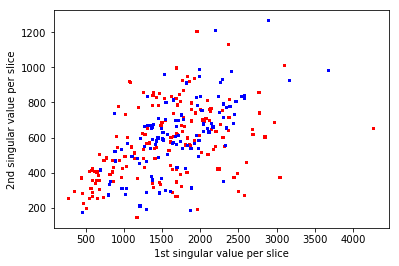

In [43]:
plt.scatter(singular_values_per_file[:,0], singular_values_per_file[:,1],color=colours,marker=',',lw=0, s=10)
plt.xlabel('1st singular value per slice')
plt.ylabel('2nd singular value per slice')
plt.show()

In [44]:
singular_values_per_file[0]

array([2101.18303323,  502.31814874,  343.89791305])

In [45]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

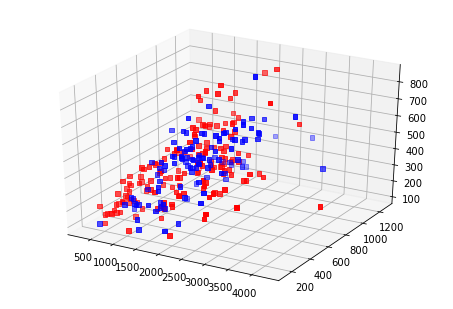

In [46]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(singular_values_per_file[:,0], singular_values_per_file[:,1],singular_values_per_file[:,2],color=colours,marker=',')
pyplot.show()

In [47]:
def load_sound_files(file_paths):
    raw_sounds = []
    raw_labels=[]
    for fp in file_paths:
        X,sr = librosa.load(fp, sr=None)
        if (fp.find('barking') != -1):
            labelfile=1
        else:
            labelfile=0
        raw_labels.append(labelfile)
        #print(X.shape)
        raw_sounds.append(X)
        #print(sr)
    return sr,raw_sounds,raw_labels

In [48]:
import os
import re
relevant_path = "./data/cats_dogs/"
# get files from directory and do all or a few, depending on range extracted below
sound_file_paths = [relevant_path+f for f in os.listdir(relevant_path)]
sound_names=sound_file_paths
sound_names_smaller=[]
for x in sound_names:
    sound_names_smaller.append(os.path.basename(x))
print(sound_names_smaller)

['cat_1.wav', 'cat_10.wav', 'cat_100.wav', 'cat_101.wav', 'cat_102.wav', 'cat_103.wav', 'cat_105.wav', 'cat_106.wav', 'cat_107.wav', 'cat_108.wav', 'cat_109.wav', 'cat_11.wav', 'cat_110.wav', 'cat_112.wav', 'cat_113.wav', 'cat_114.wav', 'cat_115.wav', 'cat_116.wav', 'cat_117.wav', 'cat_118.wav', 'cat_119.wav', 'cat_12.wav', 'cat_120.wav', 'cat_121.wav', 'cat_122.wav', 'cat_123.wav', 'cat_124.wav', 'cat_125.wav', 'cat_126.wav', 'cat_127.wav', 'cat_128.wav', 'cat_129.wav', 'cat_13.wav', 'cat_130.wav', 'cat_131.wav', 'cat_132.wav', 'cat_133.wav', 'cat_134.wav', 'cat_135.wav', 'cat_136.wav', 'cat_137.wav', 'cat_138.wav', 'cat_139.wav', 'cat_14.wav', 'cat_140.wav', 'cat_141.wav', 'cat_142.wav', 'cat_143.wav', 'cat_144.wav', 'cat_146.wav', 'cat_147.wav', 'cat_148.wav', 'cat_149.wav', 'cat_15.wav', 'cat_150.wav', 'cat_151.wav', 'cat_152.wav', 'cat_153.wav', 'cat_154.wav', 'cat_155.wav', 'cat_156.wav', 'cat_157.wav', 'cat_158.wav', 'cat_159.wav', 'cat_16.wav', 'cat_160.wav', 'cat_161.wav', 'ca

In [49]:
import audioread
import numpy as np
import scipy.signal
import scipy.fftpack as fft
import resampy
with audioread.audio_open(os.path.realpath(sound_file_paths[0])) as input_file:
        sr_native = input_file.samplerate
        n_channels = input_file.channels
print('sr_native:',sr_native)
print('n_channels:',n_channels)

sr_native: 16000
n_channels: 1


In [50]:
print('going to load:',sound_file_paths)
sr,raw_sounds,raw_labels = load_sound_files(sound_file_paths)
print('sampling rate:',sr)

going to load: ['./data/cats_dogs/cat_1.wav', './data/cats_dogs/cat_10.wav', './data/cats_dogs/cat_100.wav', './data/cats_dogs/cat_101.wav', './data/cats_dogs/cat_102.wav', './data/cats_dogs/cat_103.wav', './data/cats_dogs/cat_105.wav', './data/cats_dogs/cat_106.wav', './data/cats_dogs/cat_107.wav', './data/cats_dogs/cat_108.wav', './data/cats_dogs/cat_109.wav', './data/cats_dogs/cat_11.wav', './data/cats_dogs/cat_110.wav', './data/cats_dogs/cat_112.wav', './data/cats_dogs/cat_113.wav', './data/cats_dogs/cat_114.wav', './data/cats_dogs/cat_115.wav', './data/cats_dogs/cat_116.wav', './data/cats_dogs/cat_117.wav', './data/cats_dogs/cat_118.wav', './data/cats_dogs/cat_119.wav', './data/cats_dogs/cat_12.wav', './data/cats_dogs/cat_120.wav', './data/cats_dogs/cat_121.wav', './data/cats_dogs/cat_122.wav', './data/cats_dogs/cat_123.wav', './data/cats_dogs/cat_124.wav', './data/cats_dogs/cat_125.wav', './data/cats_dogs/cat_126.wav', './data/cats_dogs/cat_127.wav', './data/cats_dogs/cat_128.wav

sampling rate: 16000


In [51]:
def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        print('going to plot',f)
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 1: Waveplot')
    plt.show()

going to plot wav
going to plot [ 0.00378418  0.00326538  0.00021362 ... -0.01663208 -0.01507568
 -0.0161438 ]
going to plot [0.0015564  0.0020752  0.00134277 ... 0.00296021 0.00396729 0.00387573]


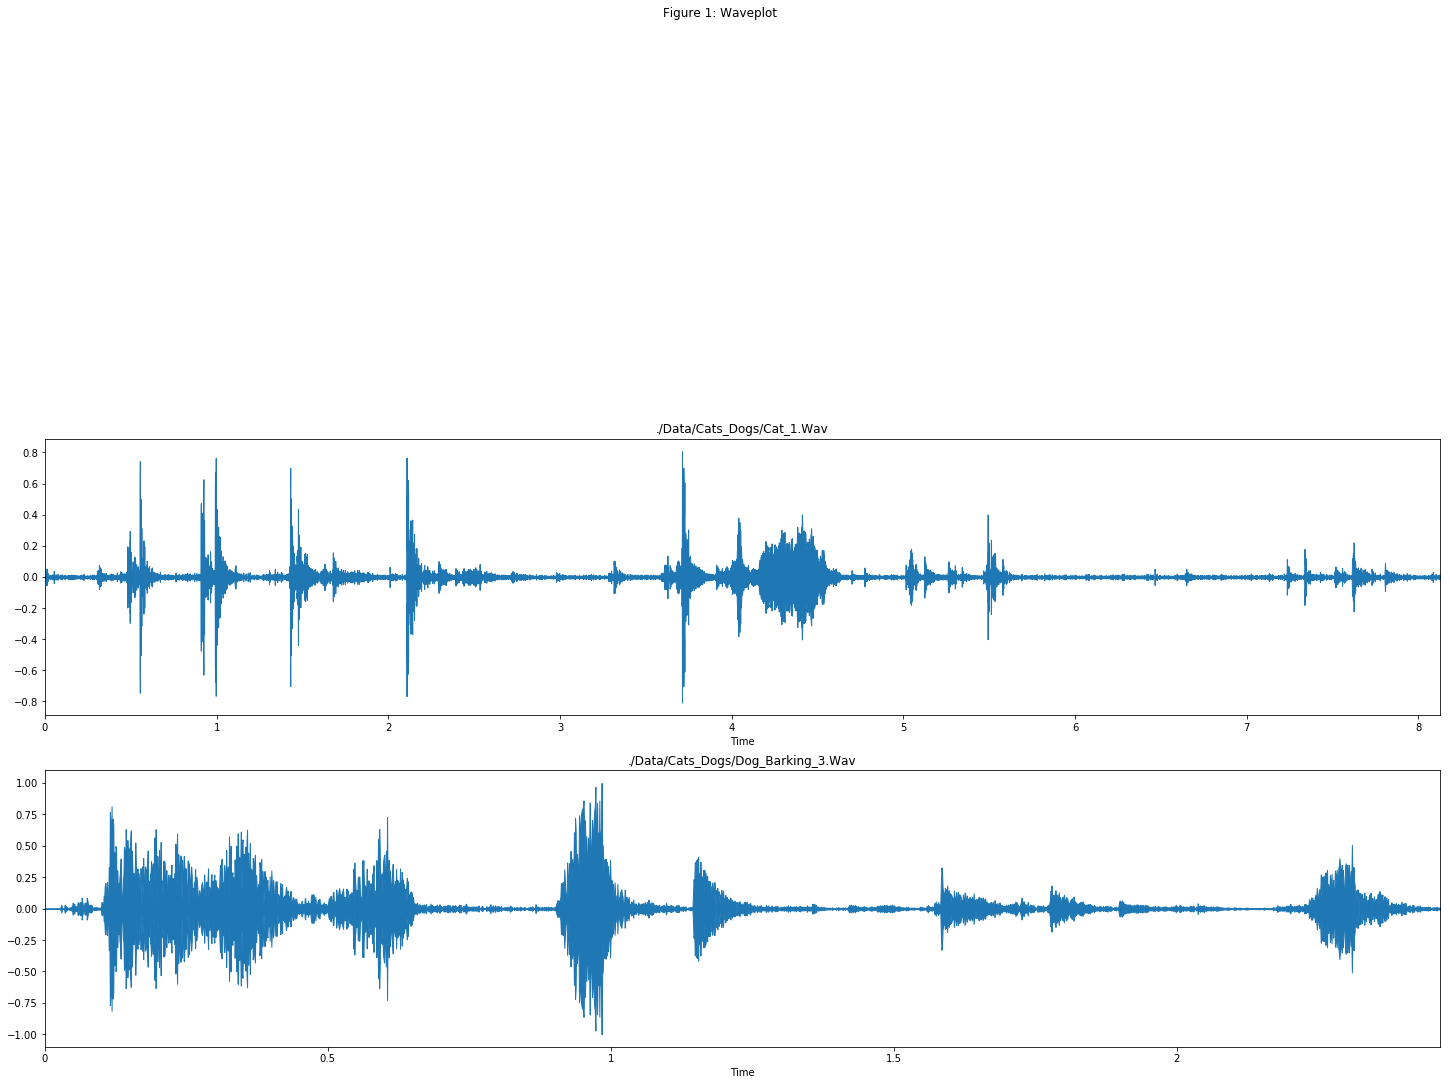

In [52]:
print('going to plot wav')
plot_waves([sound_names[0],sound_names[200]],[raw_sounds[0],raw_sounds[200]])

In [53]:
def rmse(raw_sound):
    rmse = np.sum(librosa.feature.rmse(y=raw_sound))
    return rmse

In [54]:
np.sum(librosa.feature.rmse(y=raw_sounds[0]))

10.317839

In [55]:
rmse(raw_sounds[0])

10.317839

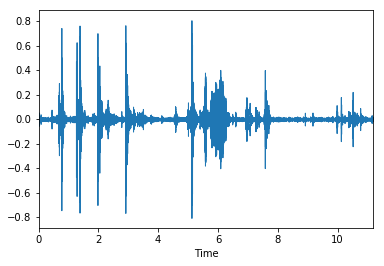

In [56]:
librosa.display.waveplot(raw_sounds[0], sr=sr)

In [57]:
def energy(raw_sound):
    energy = sum(abs(raw_sound**2))/len(raw_sound)
    return energy

In [58]:
energy(raw_sounds[0])

0.0023526707791305464

In [59]:
energy(raw_sounds[0])

0.0023526707791305464

In [60]:
tempo, _ = librosa.beat.beat_track(y=raw_sounds[0], sr=sr)

C:\ProgramData\Anaconda3\lib\site-packages\librosa\filters.py:271: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


In [61]:
tempo

144.23076923076923

In [62]:
pitches, magnitudes = librosa.piptrack(y=raw_sounds[0])


In [63]:
pitches.size

359775

In [64]:
sum(abs(librosa.feature.mfcc(y=raw_sounds[1])[0,:]))/librosa.feature.mfcc(y=raw_sounds[1])[0,:].size

279.4230572164531

In [65]:
energy_array=[]
rmse_array=[]
tempo_array=[]
pitch_array=[]
mfcc1_array=[]
mfcc2_array=[]
mfcctotal_array=[]
for f in raw_sounds:
    energy_array.append(energy(f))
    rmse_array.append(rmse(f))
    tempo,  _ = librosa.beat.beat_track(y=f, sr=sr)
    tempo_array.append(tempo)
    pitches, magnitudes = librosa.piptrack(y=f)
    pitch_array.append(sum(sum(abs(pitches)))/pitches.size)
    mfcc=librosa.feature.mfcc(y=f)
    mfcc1_array.append(sum(abs(mfcc[0,:]))/mfcc[0,:].size)
    mfcc2_array.append(sum(abs(mfcc[1,:]))/mfcc[1,:].size)
    mfcctotal_array.append(sum(sum(abs(mfcc)))/mfcc.size)

C:\ProgramData\Anaconda3\lib\site-packages\librosa\filters.py:271: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


In [66]:
len(energy_array)

277

In [67]:
colours = [eval(x) for x in np.array(raw_labels)]

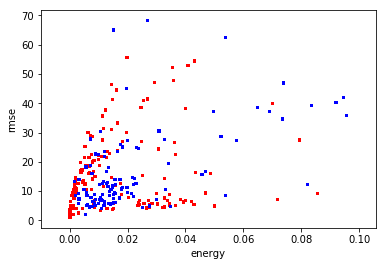

In [68]:
plt.scatter(energy_array, rmse_array,color=colours,marker=',',lw=0, s=10)
plt.xlabel('energy')
plt.ylabel('rmse')
plt.show()

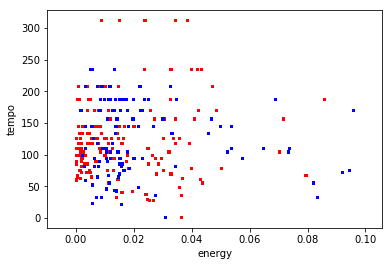

In [69]:
plt.scatter(energy_array, tempo_array,color=colours,marker=',',lw=0, s=10)
plt.xlabel('energy')
plt.ylabel('tempo')
plt.show()

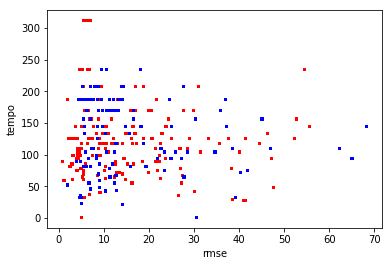

In [70]:
plt.scatter(rmse_array, tempo_array,color=colours,marker=',',lw=0, s=10)
plt.xlabel('rmse')
plt.ylabel('tempo')
plt.show()

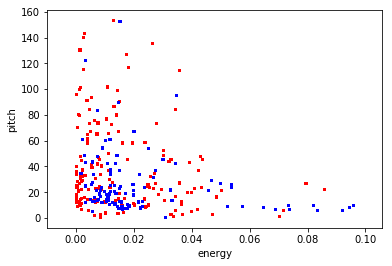

In [71]:
plt.scatter(energy_array, pitch_array,color=colours,marker=',',lw=0, s=10)
plt.xlabel('energy')
plt.ylabel('pitch')
plt.show()

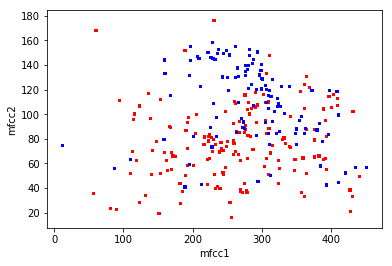

In [72]:
plt.scatter(mfcc1_array, mfcc2_array,color=colours,marker=',',lw=0, s=10)
plt.xlabel('mfcc1')
plt.ylabel('mfcc2')
plt.show()

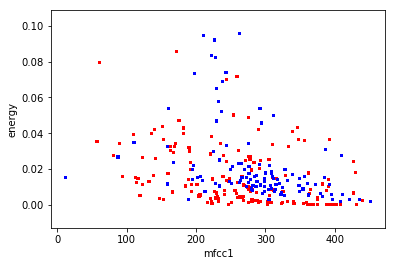

In [73]:
plt.scatter(mfcc1_array, energy_array,color=colours,marker=',',lw=0, s=10)
plt.xlabel('mfcc1')
plt.ylabel('energy')
plt.show()

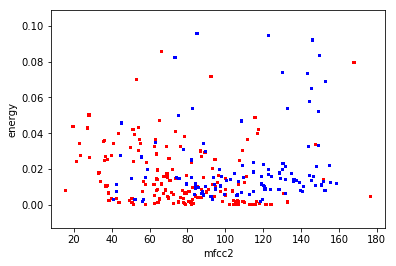

In [74]:
plt.scatter(mfcc2_array, energy_array,color=colours,marker=',',lw=0, s=10)
plt.xlabel('mfcc2')
plt.ylabel('energy')
plt.show()

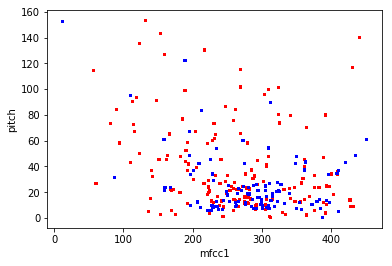

In [75]:
plt.scatter(mfcc1_array, pitch_array,color=colours,marker=',',lw=0, s=10)
plt.xlabel('mfcc1')
plt.ylabel('pitch')
plt.show()

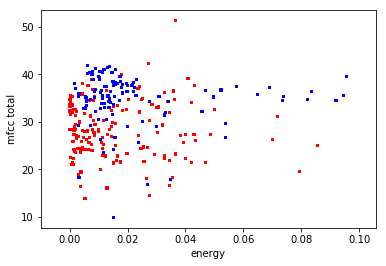

In [76]:
plt.scatter(energy_array, mfcctotal_array,color=colours,marker=',',lw=0, s=10)
plt.xlabel('energy')
plt.ylabel('mfcc total')
plt.show()

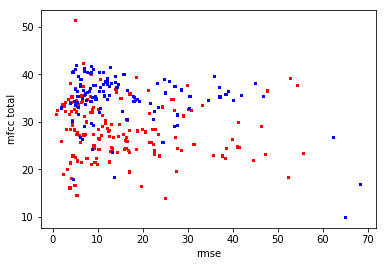

In [77]:
plt.scatter(rmse_array, mfcctotal_array,color=colours,marker=',',lw=0, s=10)
plt.xlabel('rmse')
plt.ylabel('mfcc total')
plt.show()

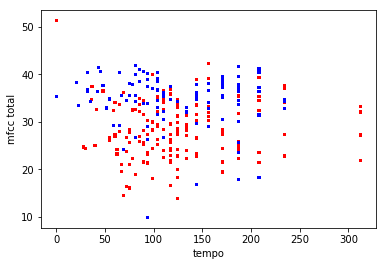

In [78]:
plt.scatter(tempo_array, mfcctotal_array,color=colours,marker=',',lw=0, s=10)
plt.xlabel('tempo')
plt.ylabel('mfcc total')
plt.show()

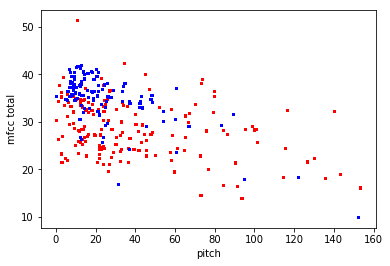

In [79]:
plt.scatter(pitch_array, mfcctotal_array,color=colours,marker=',',lw=0, s=10)
plt.xlabel('pitch')
plt.ylabel('mfcc total')
plt.show()

In [80]:
X=np.transpose(np.array([mfcctotal_array, energy_array]))
X.shape

(277, 2)

In [81]:
# clustering dataset
# determine k using elbow method
 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

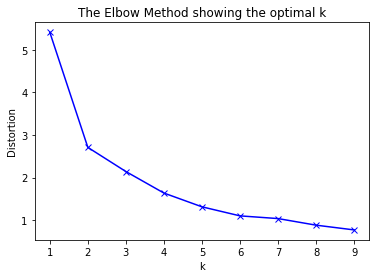

In [82]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
# now split
X_train, X_test, y_train, y_test = train_test_split(X, raw_labels, test_size=0.1, random_state=59)

In [84]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 2)
knn = KNeighborsClassifier(n_neighbors=2)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))


0.6071428571428571


In [85]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, pred, [0, 1])

In [86]:
con_mat

array([[14,  2],
       [ 9,  3]], dtype=int64)

In [87]:
import math
total_accuracy = (con_mat[0, 0] + con_mat[1, 1]) / float(np.sum(con_mat))
class1_accuracy = (con_mat[0, 0] / float(np.sum(con_mat[0, :])))
class2_accuracy = (con_mat[1, 1] / float(np.sum(con_mat[1, :])))
print(con_mat)
print('Total accuracy: %.5f' % total_accuracy)
print('Class1 accuracy: %.5f' % class1_accuracy)
print('Class2 accuracy: %.5f' % class2_accuracy)
print('Geometric mean accuracy: %.5f' % math.sqrt((class1_accuracy * class2_accuracy)))

[[14  2]
 [ 9  3]]
Total accuracy: 0.60714
Class1 accuracy: 0.87500
Class2 accuracy: 0.25000
Geometric mean accuracy: 0.46771
